# Whistle Detection

## Dataset Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from data import WhistleDataset
from models import WHISTLEDATA_CONFIG as DATA_PARAMS

dataset = WhistleDataset(name = 'whistle/saved/boh', tobeloaded=True, params=DATA_PARAMS)
dataset.summarize()

DATA LOADED!

N Examples: 629440
N Classes: 2
Classes: [0. 1.]
 - Class 0: 314720 (50.0)
 - Class 1: 314720 (50.0)


## Training

In [3]:
from models import WhistleNet

name = 'whistle/boh'
model = WhistleNet(name)

In [4]:
from core.trainer import Trainer
import time
from models import WHISTLETRAIN_CONFIG as TRAIN_PARAMS
train_model = False

trainer = Trainer(params=TRAIN_PARAMS)
start_time = time.time()
if train_model:
    trainer.fit(model,dataset)
    model.training_time = time.time() - start_time

MODEL LOADED!


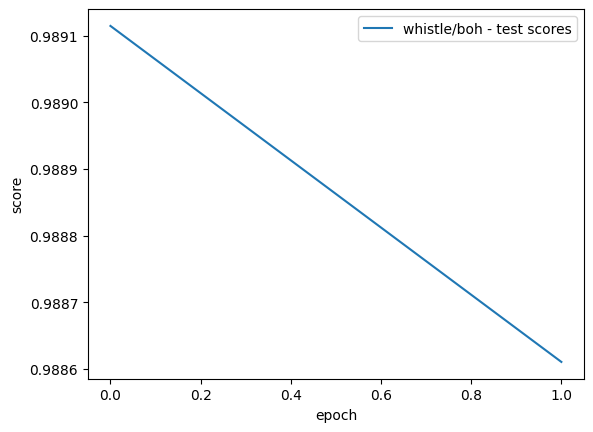

In [5]:
import matplotlib.pyplot as plt # type: ignore

complete_plot = False
    
model.load(name)
plt.plot(model.test_scores, label=f'{name} - test scores')
if complete_plot:
    plt.plot(model.train_scores, label=f'{name} - train scores')
    plt.plot(model.val_scores, label=f'{name} - val scores')
        
plt.legend()
plt.ylabel('score')
plt.xlabel('epoch')
plt.show()

## Onnx Model

## Inference

frame 0, time 0.00
tensor([[5.4256, 0.0000]]): NO
frame 1, time 0.02
tensor([[5.0961, 0.0000]]): NO
frame 2, time 0.05
tensor([[5.1203, 0.0000]]): NO
frame 3, time 0.07
tensor([[5.1041, 0.0000]]): NO
frame 4, time 0.09
tensor([[5.0852, 0.0000]]): NO
frame 5, time 0.12
tensor([[5.1176, 0.0000]]): NO
frame 6, time 0.14
tensor([[5.1021, 0.0000]]): NO
frame 7, time 0.16
tensor([[5.1143, 0.0000]]): NO
frame 8, time 0.19
tensor([[5.1030, 0.0000]]): NO
frame 9, time 0.21
tensor([[5.1048, 0.0000]]): NO
frame 10, time 0.23
tensor([[5.1261, 0.0000]]): NO
frame 11, time 0.26
tensor([[5.1263, 0.0000]]): NO
frame 12, time 0.28
tensor([[5.1052, 0.0000]]): NO
frame 13, time 0.30
tensor([[5.1061, 0.0000]]): NO
frame 14, time 0.33
tensor([[5.1374, 0.0000]]): NO
frame 15, time 0.35
tensor([[5.1270, 0.0000]]): NO
frame 16, time 0.37
tensor([[5.1056, 0.0000]]): NO
frame 17, time 0.39
tensor([[5.0806, 0.0000]]): NO
frame 18, time 0.42
tensor([[5.0969, 0.0000]]): NO
frame 19, time 0.44
tensor([[5.0932, 0.00

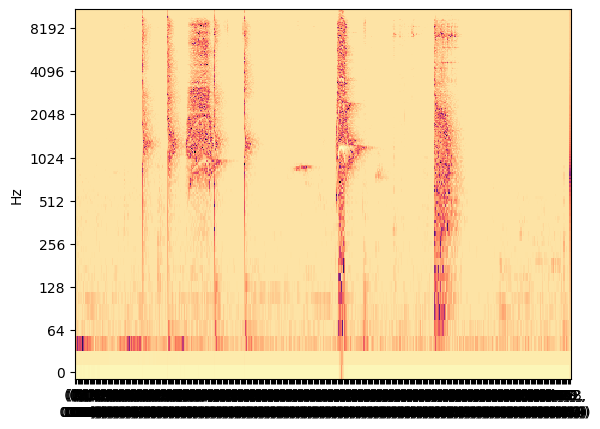

In [6]:
import torch # type: ignore
# import sounddevice as sd
from utils import Audio, project_root

def classify(window):
    with torch.no_grad():
        prediction = model(window)
    predicted_class = torch.argmax(prediction).item()
    if predicted_class == 0:
        print(f"{prediction}: NO")
    else:
        print(f"{prediction}: YES")
    return predicted_class


projroot = project_root()
audio = Audio(name="test4", datapath=f'{projroot}/data/whistle/raw/test')
for i in range(audio.S.shape[1]):
    window = audio.S[:,i].reshape(1,1,513)
    print(f"frame {i}, time {audio.frame2time(i):.2f}")
    classify(window)
audio.freq_plot()